In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
pd.options.display.max_rows = 1000000

In [7]:
strat_train = pd.read_csv('unem_75%_train.csv')
# strat_test = pd.read_csv(('25%_test.csv'))

In [50]:
le = len(strat_train)

In [54]:
le

10934324

In [51]:
su = sum(strat_train['Is Fraud?'])

In [53]:
su

2616

In [52]:
su/le

0.00023924661460553027

In [9]:
strat_train.columns

Index(['Unnamed: 0', 'User', 'Card', 'Time', 'Unemploy_Rate', 'Gender',
       'Num Credit Cards', 'Has Chip', 'Cards Issued', 'Card Age',
       'PC_Income_binned', 'SQR_Debt_binned', 'PIN_Binned',
       'Year_Income_binned', 'SQR_Credit_binned', 'Log_Amount_binned',
       'FICO binned', 'Chip Transaction', 'Swipe Transaction', 'Credit',
       'Debit', 'Debit (Prepaid)', 'Amex', 'Discover', 'Mastercard', 'Visa',
       'Error', 'Current_Age_Binned', 'MCC_Binned', 'Is Fraud?'],
      dtype='object')

In [17]:
def model_prep(strat_train):
    strat_train = strat_train.sort_values(by = 'User', axis=0, ascending=True)
    strat_train = strat_train.reset_index()
    strat_train = strat_train.drop(['Unnamed: 0', 'User', 'index'], axis = 1)
    # Location = pd.get_dummies(strat_train['Merchant State'])
    # strat_train = pd.concat([strat_train, Location], axis=1, join="inner")
    # strat_train = strat_train.drop('Merchant State', axis = 1)
    column_to_reorder = strat_train.pop('Is Fraud?')
    strat_train.insert(len(strat_train.columns), 'Is Fraud?', column_to_reorder)
    return strat_train    

In [18]:
c_train = model_prep(strat_train)

In [5]:
c_test = model_prep(strat_test)

In [22]:
c_train = strat_train.copy()

In [23]:
c_test = strat_test.copy()

In [12]:
c_train.isnull().sum()

index                 0
Card                  0
Time                  0
Unemploy_Rate         0
Gender                0
Num Credit Cards      0
Has Chip              0
Cards Issued          0
Card Age              0
PC_Income_binned      0
SQR_Debt_binned       0
PIN_Binned            0
Year_Income_binned    0
SQR_Credit_binned     0
Log_Amount_binned     0
FICO binned           0
Chip Transaction      0
Swipe Transaction     0
Credit                0
Debit                 0
Debit (Prepaid)       0
Amex                  0
Discover              0
Mastercard            0
Visa                  0
Error                 0
Current_Age_Binned    0
MCC_Binned            0
Is Fraud?             0
dtype: int64

In [30]:
# copy['State_Len'] = copy['Merchant State'].str.len()
# copy = copy.drop('Merchant State', axis = 1)

In [26]:
# fraud = copy.loc[copy['Is Fraud?'] == 1]

In [33]:
# copy = copy.drop(['Merchant City', 'City'], axis = 1)

In [12]:
copy = copy.drop('State', axis = 1)

In [36]:
# copy.loc[copy.State_Len <= 2, 'State_Len'] = 0
# copy.loc[copy.State_Len > 2, 'State_Len'] = 1

In [11]:
c_test.dtypes

Card                       int64
Time                     float64
Merchant State             int64
Gender                     int64
Num Credit Cards           int64
Has Chip                   int64
Cards Issued               int64
Year PIN last Changed      int64
Card Age                   int64
PC_Income_binned           int64
SQR_Debt_binned            int64
Year_Income_binned         int64
SQR_Credit_binned          int64
Log_Amount_binned          int64
FICO binned                int64
Chip Transaction           int64
Online Transaction         int64
Swipe Transaction          int64
Credit                     int64
Debit                      int64
Debit (Prepaid)            int64
Amex                       int64
Discover                   int64
Mastercard                 int64
Visa                       int64
Error                      int64
Current_Age_Binned         int64
MCC_Binned                 int64
Is Fraud?                  int64
dtype: object

in USA/out of USA
one hot encode with less rows
make count for all fradulant trans per area - percentage 
bin by percentage of fraudulant transaction

In [19]:
X = c_train.iloc[:,:-1]
y = c_train.iloc[:,-1]

In [19]:
X_final_test = c_test.iloc[:,:-1]
y_final_test = c_test.iloc[:,-1]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)


In [22]:
X_train.head()

Card  Time  Unemploy_Rate  Gender  Num Credit Cards  Has Chip  \
10286110     0   0.0            7.6       0                 1         1   
284575       4   1.0            9.6       0                 5         1   
3205781      1   1.0            4.6       1                 4         0   
6075472      1   1.0            4.1       0                 6         1   
3629194      2   0.0            4.9       1                 5         1   

          Cards Issued  Card Age  PC_Income_binned  SQR_Debt_binned  ...  \
10286110             2       167                 3                2  ...   
284575               2        95                 2                3  ...   
3205781              1        38                 2                0  ...   
6075472              1       238                 2                1  ...   
3629194              1        96                 2                0  ...   

          Credit  Debit  Debit (Prepaid)  Amex  Discover  Mastercard  Visa  \
10286110       0      1                0     0         0           0     1   
284575         0      1                0     0         0           1     0   
3205781        0      1                0     0         0           1     0   
6075472        1      0                0     0         0           1     0   
3629194        0      1                0     0         0           0     1   

          Error  Current_Age_Binned  MCC_Binned  
10286110      1                   2           2  
284575        1                   4           6  
3205781       1                   3           6  
6075472       1                   2           4  
3629194       1                   6           6  

[5 rows x 27 columns]

In [47]:
X_train.head()

Card  Time  Unemploy_Rate  Gender  Num Credit Cards  Has Chip  \
10286110     0   0.0            7.6       0                 1         1   
284575       4   1.0            9.6       0                 5         1   
3205781      1   1.0            4.6       1                 4         0   
6075472      1   1.0            4.1       0                 6         1   
3629194      2   0.0            4.9       1                 5         1   

          Cards Issued  Card Age  PC_Income_binned  SQR_Debt_binned  ...  \
10286110             2       167                 3                2  ...   
284575               2        95                 2                3  ...   
3205781              1        38                 2                0  ...   
6075472              1       238                 2                1  ...   
3629194              1        96                 2                0  ...   

          Credit  Debit  Debit (Prepaid)  Amex  Discover  Mastercard  Visa  \
10286110       0      1                0     0         0           0     1   
284575         0      1                0     0         0           1     0   
3205781        0      1                0     0         0           1     0   
6075472        1      0                0     0         0           1     0   
3629194        0      1                0     0         0           0     1   

          Error  Current_Age_Binned  MCC_Binned  
10286110      1                   2           2  
284575        1                   4           6  
3205781       1                   3           6  
6075472       1                   2           4  
3629194       1                   6           6  

[5 rows x 27 columns]

In [33]:
!pip install xgboost

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.7 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_tree

In [62]:
# Logistic Regression 
clf = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)

In [63]:
y_pred = clf.predict(X_test)

In [64]:
confusion_matrix(y_test, y_pred)

array([[869112, 495111],
       [   975,    694]])

In [ ]:
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred))

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78   1364223
           1       0.00      0.42      0.00      1669

    accuracy                           0.64   1365892
   macro avg       0.50      0.53      0.39   1365892
weighted avg       1.00      0.64      0.78   1365892



In [30]:
# Naive Bayes
clf = GaussianNB().fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [31]:
y_pred = clf.predict(X_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[1364223,       0],
       [   1669,       0]])

In [ ]:
print(classification_report(y_test, y_pred))

In [39]:
# K nearest 
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
confusion_matrix(y_test, y_pred)

array([[1364223,       0],
       [   1669,       0]])

In [101]:
# Random Forest 
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight = 'balanced').fit(X_train, y_train)

In [102]:
y_pred = clf.predict(X_test)

In [103]:
confusion_matrix(y_test, y_pred)

array([[1143137,  221086],
       [    531,    1138]])

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91   1364223
           1       0.01      0.68      0.01      1669

    accuracy                           0.84   1365892
   macro avg       0.50      0.76      0.46   1365892
weighted avg       1.00      0.84      0.91   1365892



In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

### Oversample

In [26]:
ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_O_resampled, y_O_resampled = ros.fit_resample(X, y)

In [37]:
# Logistic Regression 
clf = LogisticRegression(random_state=0, solver='newton-cg', class_weight='balanced').fit(X_O_resampled, y_O_resampled)

KeyboardInterrupt: 

In [98]:
y_pred = clf.predict(X_test)

In [99]:
confusion_matrix(y_test, y_pred)

array([[1137195,  227028],
       [    529,    1140]])

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91   1364223
           1       0.00      0.68      0.01      1669

    accuracy                           0.83   1365892
   macro avg       0.50      0.76      0.46   1365892
weighted avg       1.00      0.83      0.91   1365892



In [89]:
# Naive Bayes
clf = GaussianNB().fit(X_O_resampled, y_O_resampled)

In [90]:
y_pred = clf.predict(X_test)

In [91]:
confusion_matrix(y_test, y_pred)

array([[1027576,  336647],
       [   1144,     525]])

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86   1364223
           1       0.00      0.31      0.00      1669

    accuracy                           0.75   1365892
   macro avg       0.50      0.53      0.43   1365892
weighted avg       1.00      0.75      0.86   1365892



In [39]:
# K nearest 
clf = KNeighborsClassifier(n_neighbors=3).fit(X_O_resampled, y_O_resampled)

In [40]:
y_pred = clf.predict(X_test)


KeyboardInterrupt



In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [26]:
# Random Forest 
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight = 'balanced_subsample').fit(X_O_resampled, y_O_resampled)

KeyboardInterrupt: 

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1203486
           1       0.01      0.63      0.01       650

    accuracy                           0.95   1204136
   macro avg       0.50      0.79      0.49   1204136
weighted avg       1.00      0.95      0.97   1204136



Text(0.5, 0, 'Random Forest Feature Importance')

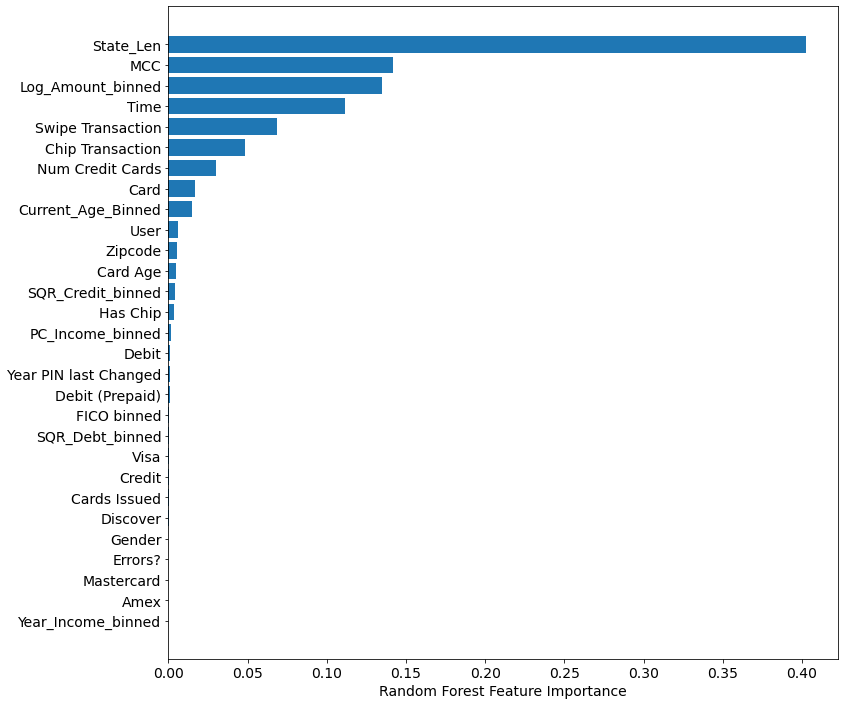

In [69]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [27]:
# xgboost
model = xgb.XGBClassifier().fit(X_O_resampled, y_O_resampled)

In [38]:
X_O_resampled.columns

Index(['Card', 'Time', 'Unemploy_Rate', 'Gender', 'Num Credit Cards',
       'Has Chip', 'Cards Issued', 'Card Age', 'PC_Income_binned',
       'SQR_Debt_binned', 'PIN_Binned', 'Year_Income_binned',
       'SQR_Credit_binned', 'Log_Amount_binned', 'FICO binned',
       'Chip Transaction', 'Swipe Transaction', 'Credit', 'Debit',
       'Debit (Prepaid)', 'Amex', 'Discover', 'Mastercard', 'Visa', 'Error',
       'Current_Age_Binned', 'MCC_Binned'],
      dtype='object')

In [39]:
sum(y_O_resampled)

10931708

In [28]:
y_pred = model.predict(X_test)

In [29]:
confusion_matrix(y_test, y_pred)

array([[2732927,       0],
       [      0,     654]])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2732927
           1       1.00      1.00      1.00       654

    accuracy                           1.00   2733581
   macro avg       1.00      1.00      1.00   2733581
weighted avg       1.00      1.00      1.00   2733581



In [42]:
plt.rcParams.update({'figure.figsize': (12.0, 14.0)})
plt.rcParams.update({'font.size': 14})

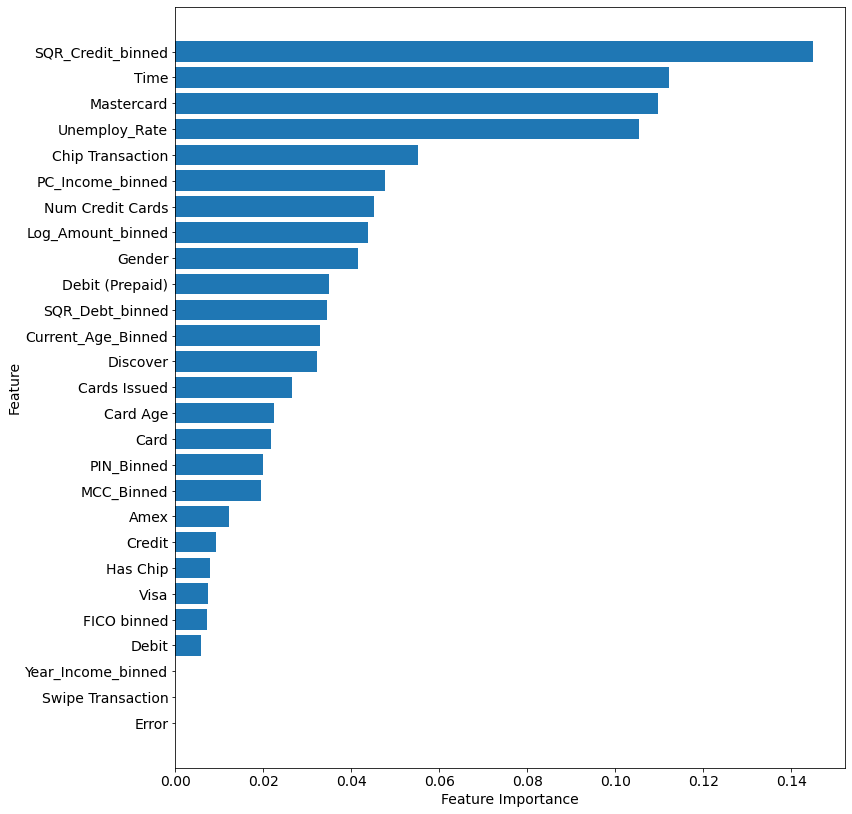

In [43]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel('Feature')
plt.savefig('XGBoost_Feature_Importance.png')

In [14]:
# in or out of US
confusion_matrix(y_test, y_pred)

array([[1301921,   62533],
       [    101,    1571]])

In [15]:
# in or out of us
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1364454
           1       0.02      0.94      0.05      1672

    accuracy                           0.95   1366126
   macro avg       0.51      0.95      0.51   1366126
weighted avg       1.00      0.95      0.98   1366126



In [19]:
plt.rcParams.update({'figure.figsize': (12.0, 12.0)})
plt.rcParams.update({'font.size': 14})

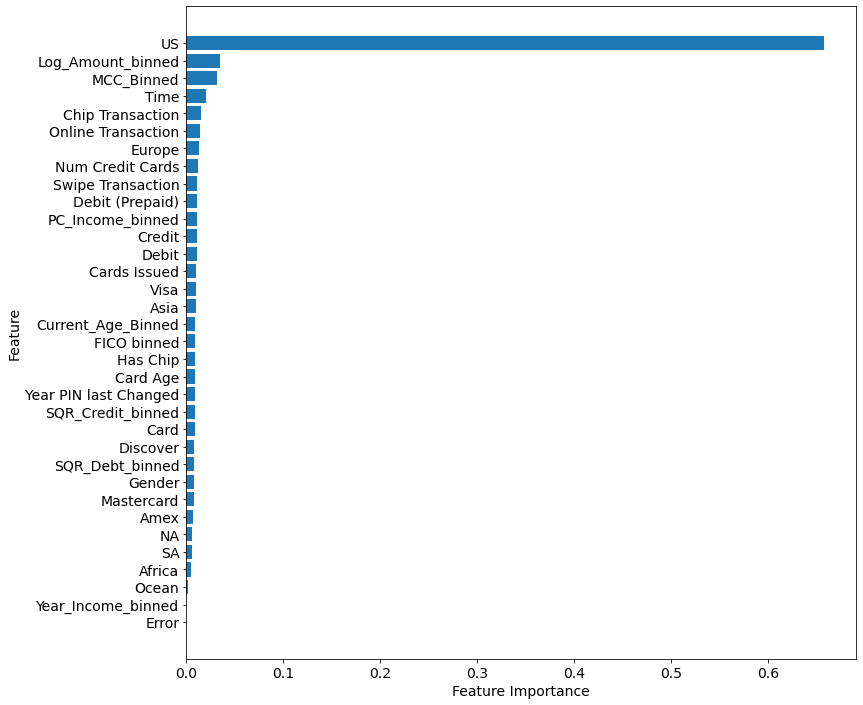

In [20]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel('Feature')
plt.savefig('XGBoost_Feature_Importance.png')

In [17]:
# take 2 testing
confusion_matrix(y_test, y_pred)

array([[3456204,  152805],
       [    157,    1809]])

In [18]:
# take 2 testing 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   3609009
           1       0.01      0.92      0.02      1966

    accuracy                           0.96   3610975
   macro avg       0.51      0.94      0.50   3610975
weighted avg       1.00      0.96      0.98   3610975



In [18]:
# take one 50% with MCC not binned and zipcode in place
confusion_matrix(y_test, y_pred)

array([[2328316,   77673],
       [     31,    1256]])

In [19]:
# take one 50% with MCC not binned and zipcode in place
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   2405989
           1       0.02      0.98      0.03      1287

    accuracy                           0.97   2407276
   macro avg       0.51      0.97      0.51   2407276
weighted avg       1.00      0.97      0.98   2407276



In [27]:
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(300, 300)
plt.show()

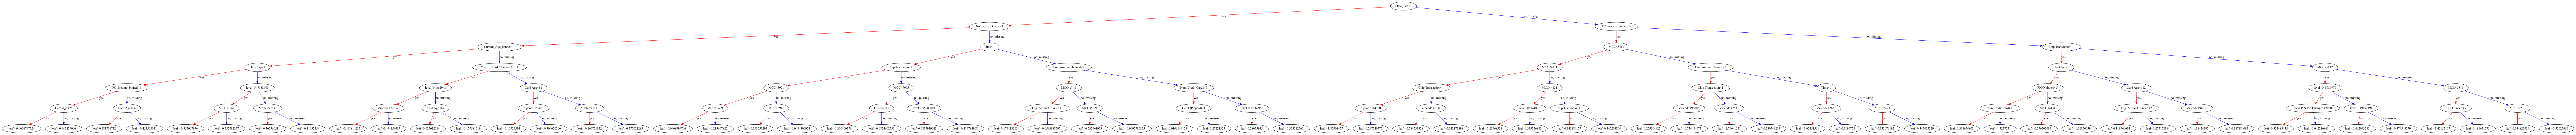

In [60]:
plot_tree(model, num_trees=4)
fig = plt.gcf()
fig.set_size_inches(300, 300)
plt.show()

In [26]:
plot_tree(model, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(300, 300)
plt.show()

## Undersample

In [20]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_U_resampled, y_U_resampled = rus.fit_resample(X, y)

In [153]:
# Logistic Regression 
clf = LogisticRegression(random_state=0, solver='newton-cg', class_weight='balanced').fit(X_U_resampled, y_U_resampled)

The line search algorithm did not converge
The line search algorithm did not converge
newton-cg failed to converge. Increase the number of iterations.


In [154]:
y_pred = clf.predict(X_test)

In [155]:
confusion_matrix(y_test, y_pred)

array([[1135882,  228341],
       [    529,    1140]])

In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91   1364223
           1       0.00      0.68      0.01      1669

    accuracy                           0.83   1365892
   macro avg       0.50      0.76      0.46   1365892
weighted avg       1.00      0.83      0.91   1365892



In [46]:
# Naive Bayes
clf = GaussianNB().fit(X_U_resampled, y_U_resampled)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
confusion_matrix(y_test, y_pred)

array([[1051467,  312756],
       [   1215,     454]])

In [ ]:
print(classification_report(y_test, y_pred))

In [21]:
# Random Forest 
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight='balanced_subsample').fit(X_U_resampled, y_U_resampled)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
confusion_matrix(y_test, y_pred)

array([[1133144,   69502],
       [    218,     452]])

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1202646
           1       0.01      0.67      0.01       670

    accuracy                           0.94   1203316
   macro avg       0.50      0.81      0.49   1203316
weighted avg       1.00      0.94      0.97   1203316



In [40]:
# xgboost
model = xgb.XGBClassifier().fit(X_U_resampled, y_U_resampled)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred)

array([[1133144,   69502],
       [    218,     452]])

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1202646
           1       0.01      0.67      0.01       670

    accuracy                           0.94   1203316
   macro avg       0.50      0.81      0.49   1203316
weighted avg       1.00      0.94      0.97   1203316



In [140]:
!pip install shap

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 20.1 MB/s eta 0:00:0000:0100:01
  Created wheel for shap: filename=shap-0.40.0-cp38-cp38-macosx_12_0_arm64.whl size=429723 sha256=20ced7fd8629a4848a1ea4cf04fd54a009e5aa948c0d7b4492968409fa6bd479
  Stored in directory: /Users/george/Library/Caches/pip/wheels/77/07/6b/ff54f2fdec86581ea5f6131ec0fd424bef58841d6684035114
Successfully built shap
  DEPRECATION: Configurin

In [32]:
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [30]:
plt.rcParams.update({'figure.figsize': (12.0, 14.0)})
plt.rcParams.update({'font.size': 14})

In [143]:
clf.feature_importances_

array([3.12557963e-03, 7.50705426e-04, 4.66713061e-02, 9.79531959e-02,
       2.63578046e-02, 9.68851900e-04, 7.98755458e-02, 0.00000000e+00,
       9.41360006e-04, 2.31915006e-03, 1.30770656e-03, 0.00000000e+00,
       1.00550022e-02, 1.83422799e-01, 5.56593524e-03, 3.03741413e-02,
       2.85549546e-01, 1.60436779e-01, 2.46595186e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.99720362e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.98684047e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.06980191e-04, 0.00000000e+00, 0.00000000e+00, 3.30522809e-06,
       9.08184059e-05, 2.89452319e-04, 4.11636411e-05, 1.21165017e-04,
       2.93253754e-02, 3.60276820e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [31]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')